<center><h1>1-ab: SIFT & BoW</h1></center>

<center><h2><a href="https://rdfia.github.io/">Course link</a></h2></center>

To keep your modifications in case you want to come back later to this colab, do *File -> Save a copy in Drive*.



In [3]:
!wget http://webia.lip6.fr/~dancette/deep-learning/assets/TP1-2-data.zip
!unzip TP1-2-data.zip

!wget https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/code/1-ab/tools.py

--2021-10-12 23:29:30--  http://webia.lip6.fr/~dancette/deep-learning/assets/TP1-2-data.zip
Resolving webia.lip6.fr (webia.lip6.fr)... 132.227.201.33
Connecting to webia.lip6.fr (webia.lip6.fr)|132.227.201.33|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86446976 (82M) [application/zip]
Saving to: ‘TP1-2-data.zip’

TP1-2-data.zip      100%[===================>]  82,44M  15,2MB/s    in 5,1s    

2021-10-12 23:29:35 (16,1 MB/s) - ‘TP1-2-data.zip’ saved [86446976/86446976]

Archive:  TP1-2-data.zip
   creating: data/
   creating: data/Scene/
   creating: data/Scene/PARoffice/
 extracting: data/Scene/PARoffice/image_0091.jpg  
 extracting: data/Scene/PARoffice/image_0167.jpg  
  inflating: data/Scene/PARoffice/image_0037.jpg  
 extracting: data/Scene/PARoffice/image_0135.jpg  
 extracting: data/Scene/PARoffice/image_0015.jpg  
 extracting: data/Scene/PARoffice/image_0182.jpg  
 extracting: data/Scene/PARoffice/image_0064.jpg  
 extracting: data/Scene/PARoffice/im

In [4]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

import numpy as np
%run 'tools.py'
from os.path import join

data_path = "data"

# Part 1 : SIFT

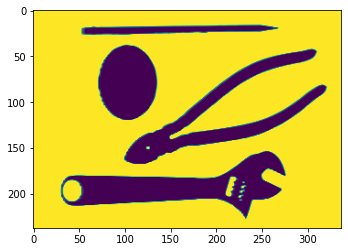

In [5]:
# example images
I = read_grayscale(join(data_path, 'tools.tiff'))
I2 = read_grayscale(join(data_path, 'Scene/CALsuburb/image_0205.jpg'))
plt.imshow(I)

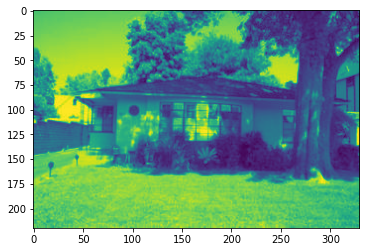

In [7]:
plt.imshow(I2)

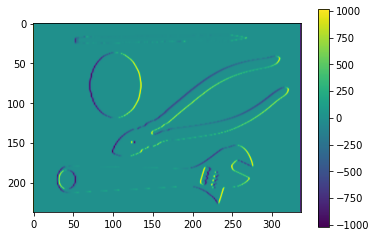

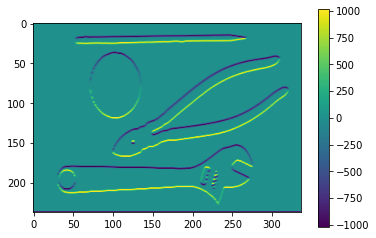

In [6]:
def compute_grad(I):
    #####################
    ## Your code here  ##
    #####################
    h_x = np.array([1, 2, 1])
    h_y = np.array([-1, 0, 1])
    Ix = conv_separable(I, h_y, h_x, pad=2)
    Iy = conv_separable(I, h_x, h_y, pad=2)
    ####################
    ##      END        #
    ####################
    return Ix, Iy

# Example
Ix, Iy = compute_grad(I)
plt.imshow(Ix)
plt.colorbar()
plt.show()
plt.imshow(Iy)
plt.colorbar()
plt.show()

In [7]:
def compute_grad_mod_ori(I):
    #####################
    ## Your code here  ##
    #####################
    Ix, Iy = compute_grad(I)
    Gn = np.sqrt(Ix**2 + Iy**2)
    Go = compute_grad_ori(Ix, Iy, Gn)
    ####################
    ##      END        #
    ####################
    return Gn, Go

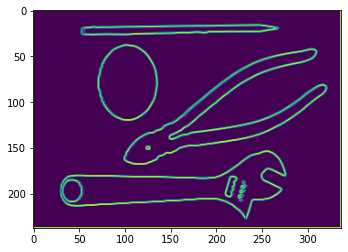

In [12]:
Gn, Go = compute_grad_mod_ori(I)
plt.imshow(Gn)
plt.show()


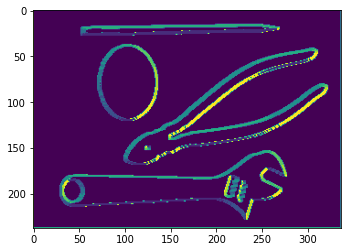

In [10]:
plt.imshow(Go)
plt.show()

In [16]:
def compute_histogram(g_n, g_o):
    """
    g_n and g_o are 4x4 matrices that contain the norm, and the discretized orientation.
    Warning: g_o can contain -1, those values should be discarded.
    """
    hist = np.zeros((8))

    #####################
    ## Votre code ici  ##
    #####################
    for j in range(4):
        for i in range(4):
            if g_o[i, j] != -1:
                hist[g_o[i, j]] += g_n[i, j]
    
    ####################
    ##      FIN        #
    ####################
    return hist
  

In [15]:
def compute_sift_region(Gn, Go, mask=None):
    t_min=.5 # evider une valeure trop grande
    t_max=.2
    with_l2 = True

    patch_size = 16
    sift = np.zeros((128)) 

    if mask is not None:
        Gn = Gn * mask
    
    idx = 0
    for k in range(0, patch_size, 4):
        for l in range(0, patch_size, 4):
            hist = compute_histogram(Gn[l:l+4,k:k+4], Go[l:l+4,k:k+4])            
            sift[idx:idx+8] = hist
            idx += 8

    norm = np.linalg.norm(sift, ord=2)
    # min thresholding on norm
    if norm <= t_min:
        return np.zeros((128))
    # l2-normalization
    if with_l2:
        sift = sift / norm
    # max thresholding on values
    sift[sift >= t_max] = t_max
    # l2-normalization
    if with_l2:
        norm = np.linalg.norm(sift, ord=2)
        sift = sift / norm
    return sift

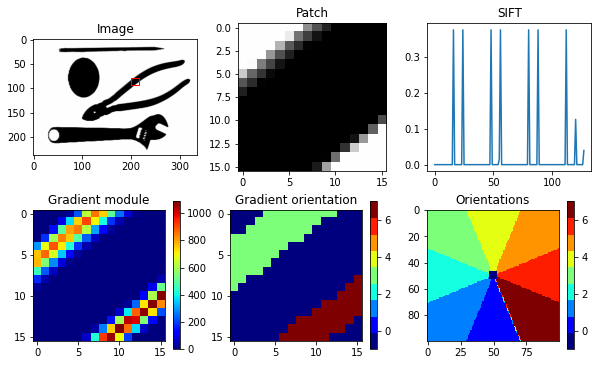

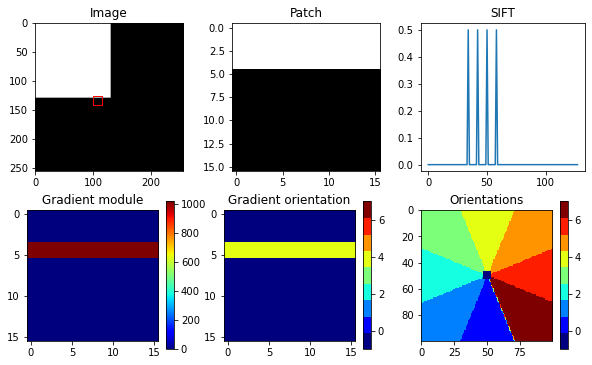

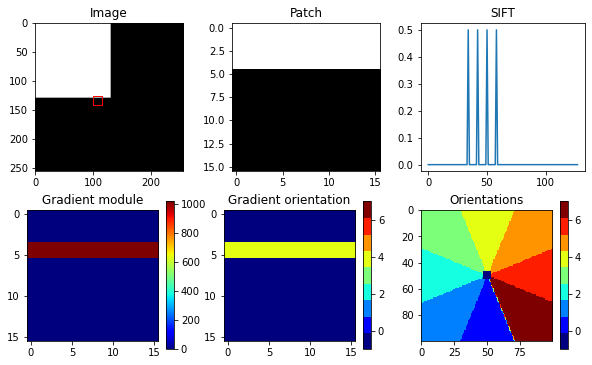

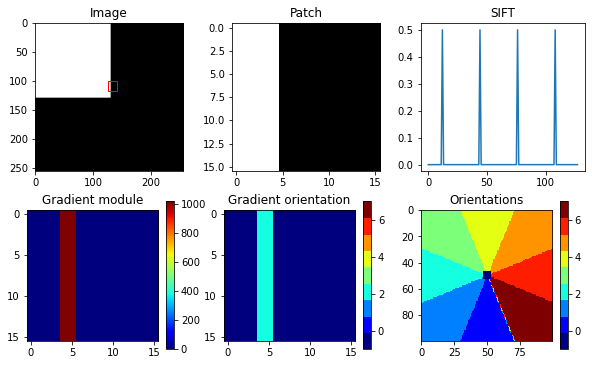

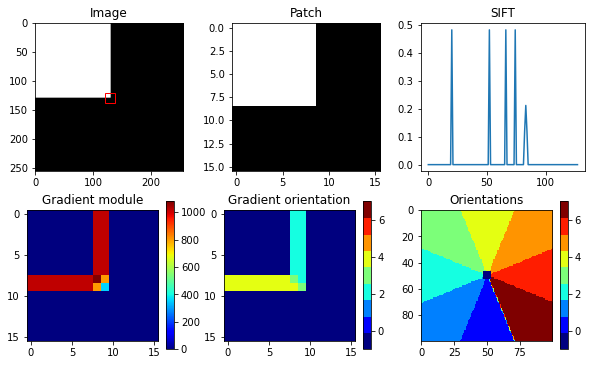

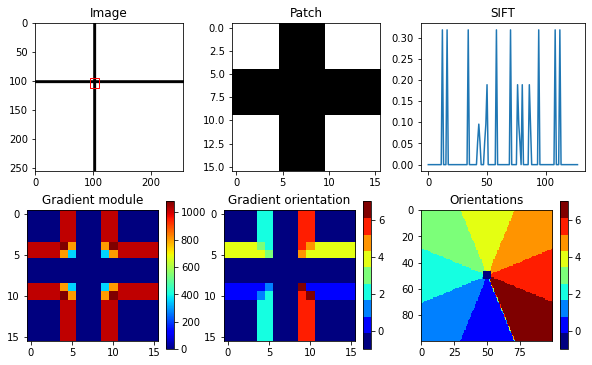

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.3181317 , 0.        , 0.        ,
       0.        , 0.3181317 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.3181317 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05344409, 0.09560369, 0.05344409,
       0.        , 0.        , 0.        , 0.05344409, 0.09560369,
       0.18864812, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.3181317 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.3181317 , 0.        , 0.        , 0.        , 0.     

In [30]:
# Example of viz of SIFTs
# set gausm to True to apply mask weighting of gradients
display_sift_region(I,           compute_grad_mod_ori, compute_sift_region, x=200, y=78, gausm=False)
display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=100, y=125, gausm=False)
display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=100, y=125, gausm=False)
display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=125, y=100, gausm=False)
display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=121, y=121, gausm=False)
display_sift_region(toy_im(),    compute_grad_mod_ori, compute_sift_region, x=95, y=95, gausm=False)

In [13]:
def compute_sift_image(I):
    x, y = dense_sampling(I)
    im = auto_padding(I)
    m = gaussian_mask()
    
    #####################
    ## Your code here  ##
    #####################
    # Here, compute on the global image (norm, gradients)
    Gn, Go = compute_grad_mod_ori(im)

    ####################
    ##      END        #
    ####################

    sifts = np.zeros((len(x), len(y), 128))
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            #####################
            ## Your code here  ##
            #####################
            Gn_region = Gn[xi:xi+16, yj:yj+16]
            Go_region = Go[xi:xi+16, yj:yj+16]
            sifts[i, j, :] = compute_sift_region(Gn_region, Go_region, mask=m) # TODO SIFT of the patch of coords (xi, yj)

            ####################
            ##      END        #
            ####################

    return sifts

# Compute SIFT

One of the stages that SIFT uses is to create a pyramid of scales of the image. It will scale down and smooth using a low pass filter.

The feature detector then works by finding features that have a peak response not only in the image space, but in scale space too. This means that it finds the scale of the image which the feature will produce the highest response.

Then, the descriptor is calculated in that scale. So when you use a smaller/larger version, it should still find the same scale for the feature.

The computation can take several minutes.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# colab

max_images_per_class = 10  # You can change this to None to compute the whole dataset (takes quite some time)

save_path = "/content/gdrive/My Drive/rdfia/"
dir_sc = os.path.join(data_path, 'Scene')
dir_sift = os.path.join(save_path, 'sift')
inames, ilabls, cnames = load_dataset(dir_sc, images_per_class=max_images_per_class)
sifts_list_by_image = compute_load_sift_dataset(dir_sc, dir_sift, inames, compute_sift_image)

In [17]:
# Local

max_images_per_class = 10  # You can change this to None to compute the whole dataset (takes quite some time)
save_path = "./rdfia/"
dir_sc = os.path.join(data_path, 'Scene')
dir_sift = os.path.join(save_path, 'sift')
inames, ilabls, cnames = load_dataset(dir_sc, images_per_class=max_images_per_class)
sifts_list_by_image = compute_load_sift_dataset(dir_sc, dir_sift, inames, compute_sift_image)

Computing or loading SIFTs
1/150
2/150
3/150
4/150
5/150
6/150
7/150
8/150
9/150
10/150
11/150
12/150
13/150
14/150
15/150
16/150
17/150
18/150
19/150
20/150
21/150
22/150
23/150
24/150
25/150
26/150
27/150
28/150
29/150
30/150
31/150
32/150
33/150
34/150
35/150
36/150
37/150
38/150
39/150
40/150
41/150
42/150
43/150
44/150
45/150
46/150
47/150
48/150
49/150
50/150
51/150
52/150
53/150
54/150
55/150
56/150
57/150
58/150
59/150
60/150
61/150
62/150
63/150
64/150
65/150
66/150
67/150
68/150
69/150
70/150
71/150
72/150
73/150
74/150
75/150
76/150
77/150
78/150
79/150
80/150
81/150
82/150
83/150
84/150
85/150
86/150
87/150
88/150
89/150
90/150
91/150
92/150
93/150
94/150
95/150
96/150
97/150
98/150
99/150
100/150
101/150
102/150
103/150
104/150
105/150
106/150
107/150
108/150
109/150
110/150
111/150
112/150
113/150
114/150
115/150
116/150
117/150
118/150
119/150
120/150
121/150
122/150
123/150
124/150
125/150
126/150
127/150
128/150
129/150
130/150
131/150
132/150
133/150
134/150
135/150
1

In [19]:
sifts_list_by_image[0].shape

(28, 42, 128)

# Part 2 : Visual dictionnary

In [10]:
from sklearn.cluster import KMeans

path_vdict = os.path.join(save_path, 'kmeans', 'vdict.npy')
os.makedirs(os.path.join(save_path, 'kmeans'), exist_ok=True)

In [44]:
# Code here the `compute_visual_dict` function
def compute_visual_dict(sift, n_clusters=1000, n_init=1, verbose=1):
    # reorder data
    dim_sift = sift[0].shape[-1]
    sift = [s.reshape(-1, dim_sift) for s in sift]
    sift = np.concatenate(sift, axis=0)
    # remove zero vectors
    keep = ~np.all(sift==0, axis=1)
    sift = sift[keep]
    # randomly pick sift
    ids, _ = compute_split(sift.shape[0], pc=0.05)
    sift = sift[ids]

    # TODO compute kmeans on `sift`, get cluster centers, add zeros vector, and return visual dict
    #####################
    ## Your code here  ##
    #####################
    # do the kmeans to generate centers as our vocabulary
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(sift)
    sift_words = kmeans.cluster_centers_
    # add an artificial 'zeros' word
    vdict = np.concatenate((sift_words, np.zeros((1, 128))))
    
    ####################
    ##      END        #
    ####################
    return vdict


In [45]:
# Run the visual dict computation (saved the first time)
vdict = compute_or_load_vdict(dir_sc, dir_sift, inames, compute_sift_image, path_vdict, compute_visual_dict)

Computing or loading visual dict
Computing or loading SIFTs
1/150
2/150
3/150
4/150
5/150
6/150
7/150
8/150
9/150
10/150
11/150
12/150
13/150
14/150
15/150
16/150
17/150
18/150
19/150
20/150
21/150
22/150
23/150
24/150
25/150
26/150
27/150
28/150
29/150
30/150
31/150
32/150
33/150
34/150
35/150
36/150
37/150
38/150
39/150
40/150
41/150
42/150
43/150
44/150
45/150
46/150
47/150
48/150
49/150
50/150
51/150
52/150
53/150
54/150
55/150
56/150
57/150
58/150
59/150
60/150
61/150
62/150
63/150
64/150
65/150
66/150
67/150
68/150
69/150
70/150
71/150
72/150
73/150
74/150
75/150
76/150
77/150
78/150
79/150
80/150
81/150
82/150
83/150
84/150
85/150
86/150
87/150
88/150
89/150
90/150
91/150
92/150
93/150
94/150
95/150
96/150
97/150
98/150
99/150
100/150
101/150
102/150
103/150
104/150
105/150
106/150
107/150
108/150
109/150
110/150
111/150
112/150
113/150
114/150
115/150
116/150
117/150
118/150
119/150
120/150
121/150
122/150
123/150
124/150
125/150
126/150
127/150
128/150
129/150
130/150
131/150


In [63]:
vdict.shape

(1001, 128)

In [51]:
len(inames)

150

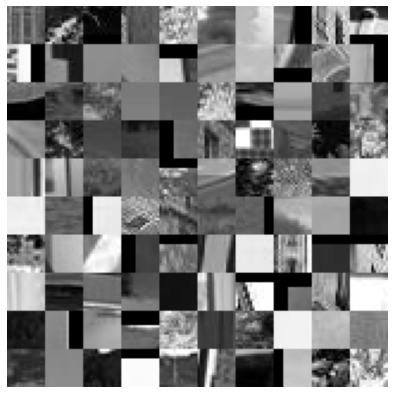

In [53]:
# Study of the dict

# choose random images
indexes = np.random.randint(0, len(inames), 30)
sifts = [sifts_list_by_image[i] for i in indexes]
chosen_inames = [inames[i] for i in indexes]

regions, sifts = get_regions_and_sifts(dir_sc, chosen_inames, sifts) # Compute SIFT and regions from 30 random images
display_images(regions[np.random.choice(len(regions), 100)]) # Show 100 random regions

In [54]:
sifts.shape

(31030, 128)

In [58]:
vdict[-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

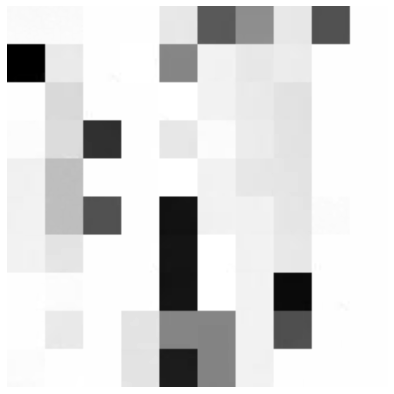

In [59]:
center_vect = vdict[-1]
dist = ((sifts - center_vect)**2).sum(axis=1)
# get best 100
top100 = dist.argsort()[:100]
top100_regions = regions[top100]
display_images(top100_regions) # Show 100 random regions

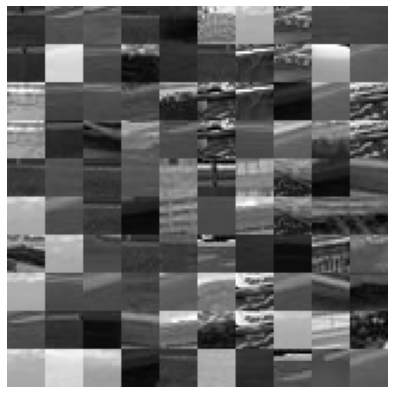

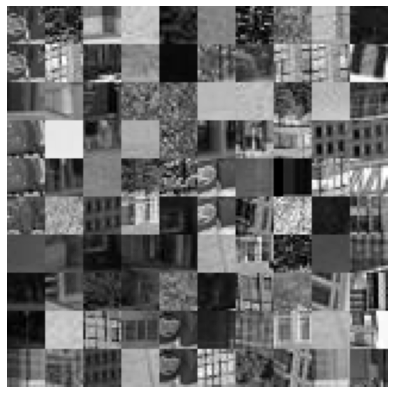

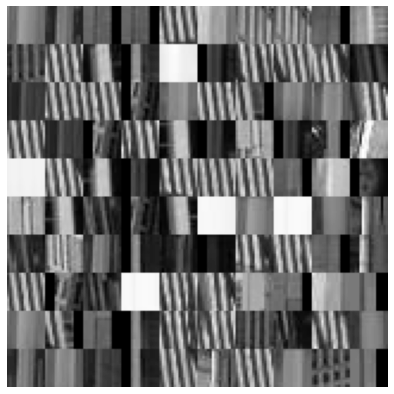

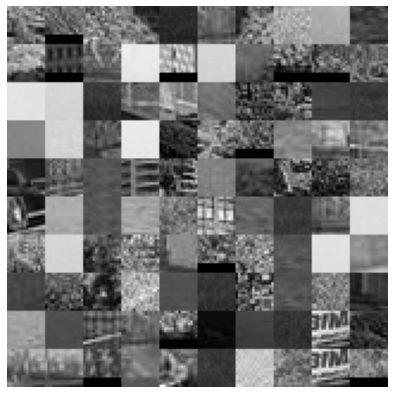

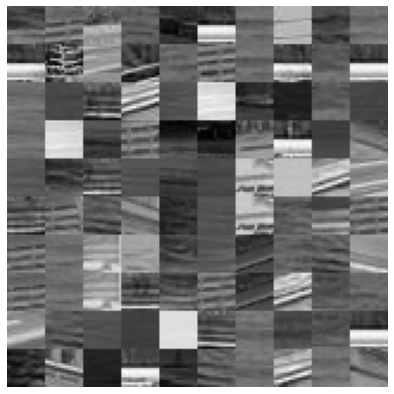

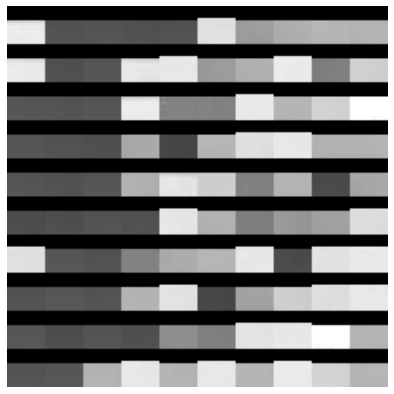

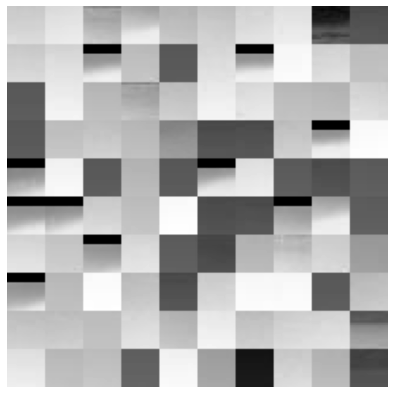

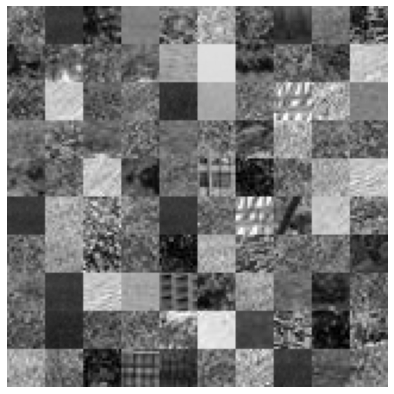

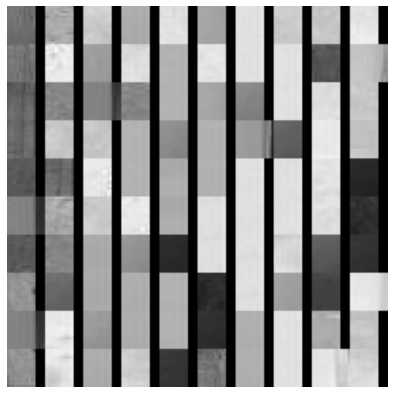

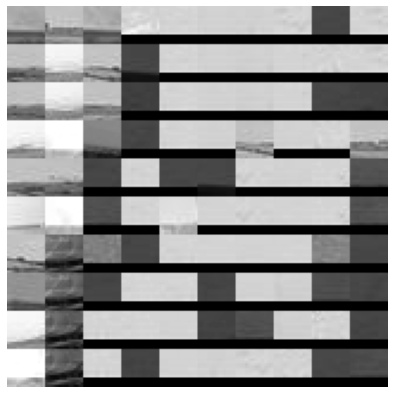

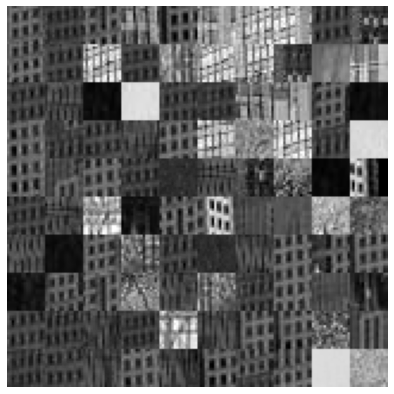

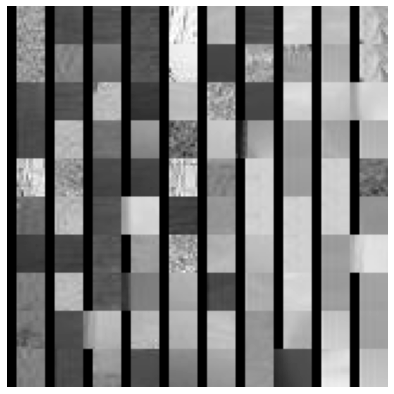

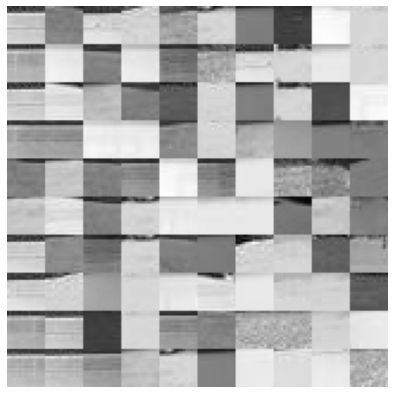

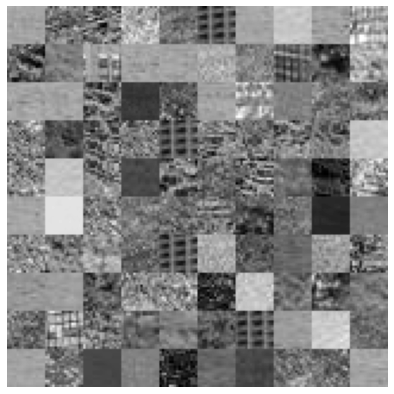

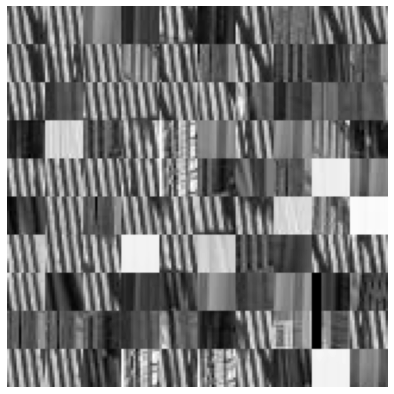

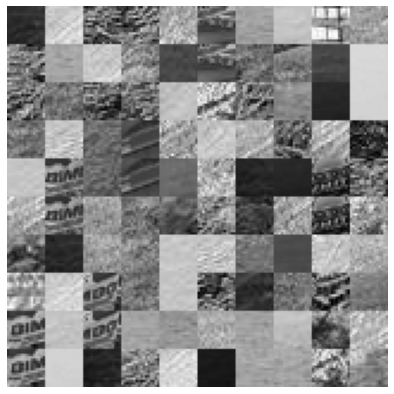

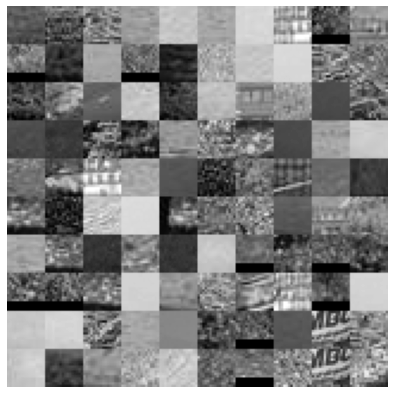

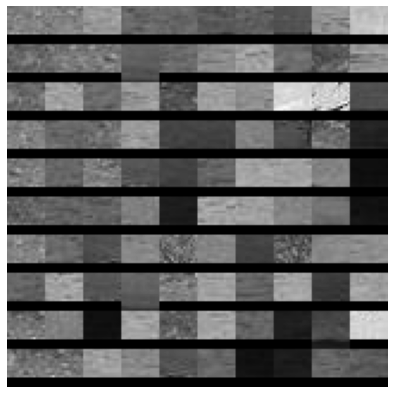

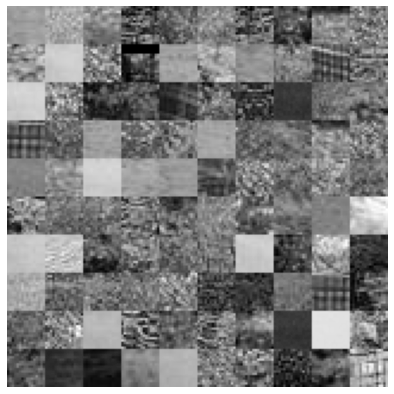

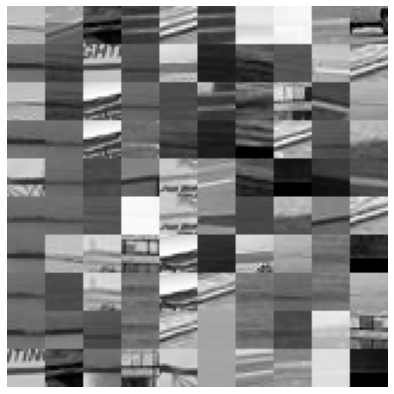

In [49]:
centers = list(range(20))
for center in centers:
  center_vect = vdict[center]
  dist = ((sifts - center_vect)**2).sum(axis=1)
  # get best 100
  top100 = dist.argsort()[:100]
  top100_regions = regions[top100]
  display_images(top100_regions) # Show 100 random regions

# Partie 3 : BoW

In this section, the goal is to obtain a numerical representationn of each image that will help us later to
classify this image (e.g. tell what does the image represent).

The goal of BoW is to summarize all the local descriptors of an image into a global descriptor with the
help of the visual dictionary.

In [60]:
# TODO Compute BoW for an image
# indication: scipy.spatial.distance_matrix
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance_matrix

def compute_feats(vdict, image_sifts):
    """
    vdict: (num_clusters, 128): visual dictionnary containing all clusters.
    image_sifts: (H, W, 128) all sift features from the given image
    """
    # flatten sifts
    sifts = image_sifts.reshape(-1, 128)  # (N, 128)
    feats = np.zeros(vdict.shape[0]) # M

    ##################### 
    ## Your code here  ##
    #####################
    # compute distance from image sifts to vdict
    distances = distance_matrix(sifts, vdict)
    max_ind =  np.argmax(distance, axis=1)
    
    ####################
    ##      END        #
    ####################
    return feats

(1001, 128)

In [66]:
im_sifts = sifts_list_by_image[0].reshape(-1, 128)  # (N, 128)

In [61]:
distance_matrix([[3,3],[0,1]], [[1,0],[1,1]])

array([[3.60555128, 2.82842712],
       [1.41421356, 1.        ]])

In [68]:
d = distance_matrix(vdict, im_sifts)

In [69]:
d.shape

(1001, 1176)

In [77]:
ind = np.argmax(d, axis=0)

In [78]:
ind.shape

(1176,)

In [73]:
ind

array([  0, 519,  22, ...,   8,  15, 520])

In [74]:
feats = np.zeros(vdict.shape[0])

In [80]:
feats[ind] += 1

In [82]:
sum(feats)

45.0

In [ ]:
# Visualize your BoW on an image

iname = inames[0]
ipath = os.path.join(dir_sc, iname)
im = read_grayscale(ipath)
sift = compute_sift_image(im)
sift = (sift * 255).astype('uint8')
regions = compute_regions(im)
feats = compute_feats(vdict, sift)

display_vdregions_image(im, vdict, sift, feats, vdregions=None) # if you have vdregions, add it as input here

Q8. simplier le pattern, mieux généralisé, moins de variance. quel type de pattern qu'on peut obtenir

Q10. Nombre optimale de cluster, 
overfitting, un cluster d'un mots
essayer plusieurs 

11, pixel peut pas être pattern, moins robuste à luminosité, brut, robuste à petit changement.

13, nombre d'occurance de mot ou pattern dans un image.

14. encoding: par rapport la distance de tous les mots etc.

In [ ]:
15, image plus gros, ou le couleur etc, 